# 1. 그래프 그려보기

In [1]:
import pandas as pd
import numpy as np

In [2]:
fueleco = pd.read_csv('data/vehicles.csv.zip')
fueleco

/Users/jeeyul/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43413,14.982273,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
43414,14.330870,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
43415,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
43416,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [3]:
fueleco.dtypes

barrels08     float64
barrelsA08    float64
charge120     float64
charge240     float64
city08          int64
               ...   
modifiedOn     object
startStop      object
phevCity        int64
phevHwy         int64
phevComb        int64
Length: 83, dtype: object

In [4]:
#object형 찾아보기
fueleco.select_dtypes(object).columns

Index(['drive', 'eng_dscr', 'fuelType', 'fuelType1', 'make', 'model',
       'mpgData', 'trany', 'VClass', 'guzzler', 'trans_dscr', 'tCharger',
       'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode',
       'c240Dscr', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop'],
      dtype='object')

In [5]:
fueleco.fuelType

0        Regular
1        Regular
2        Regular
3        Regular
4        Premium
          ...   
43413    Regular
43414    Regular
43415    Regular
43416    Regular
43417    Premium
Name: fuelType, Length: 43418, dtype: object

## 1-1 간단한 막대 그래프

<AxesSubplot:>

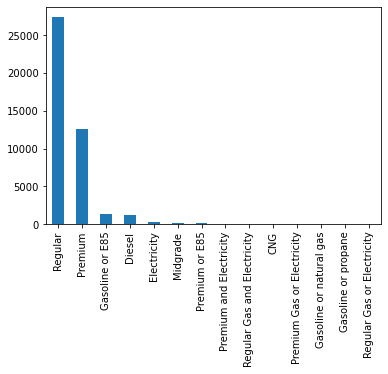

In [20]:
fueleco.fuelType.value_counts().plot(kind='bar')

## 1-2 matplotlib 사용해보기

In [40]:
# 표현하고 싶은 모델 상위 4개 고르기
top_n = fueleco.fuelType2.value_counts().index[:4]
top_n

Index(['E85', 'Electricity', 'Natural Gas', 'Propane'], dtype='object')

In [41]:
(fueleco
   .assign(make=fueleco.fuelType2.where(
              fueleco.fuelType2.isin(top_n),
              'Other'))
   .fuelType2
   .value_counts()
)

E85            1479
Electricity     224
Natural Gas      20
Propane           8
Name: fuelType2, dtype: int64

<AxesSubplot:>

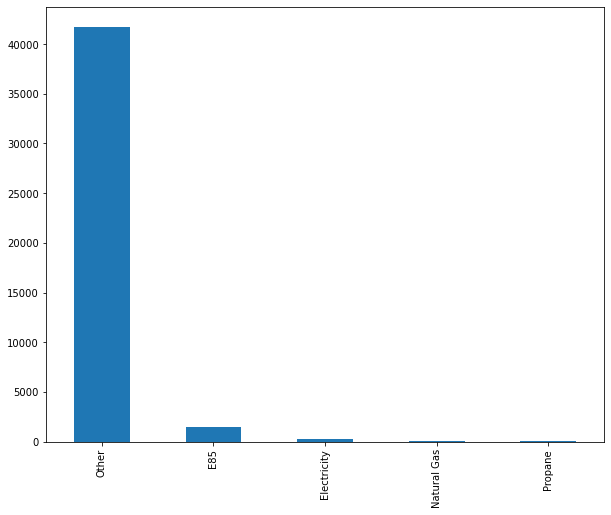

In [42]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 8))
top_n = fueleco.fuelType2.value_counts().index[:4]
(fueleco     # doctest: +SKIP
   .assign(fuelType2=fueleco.fuelType2.where(
              fueleco.fuelType2.isin(top_n),
              'Other'))
   .fuelType2
   .value_counts() #other는 보기 싫어
   .plot.bar(ax=ax) #위에서 만든 ax안에 넣어주겠다
)

## 1-3 seaborn 사용해보기

In [31]:
fueleco.trany.nunique()

40

In [44]:
top = fueleco.trany.value_counts()[:6]
top

Automatic 4-spd    11048
Manual 5-spd        8376
Automatic (S6)      3256
Automatic 3-spd     3151
Manual 6-spd        2899
Automatic (S8)      2218
Name: trany, dtype: int64

<AxesSubplot:xlabel='count', ylabel='trany'>

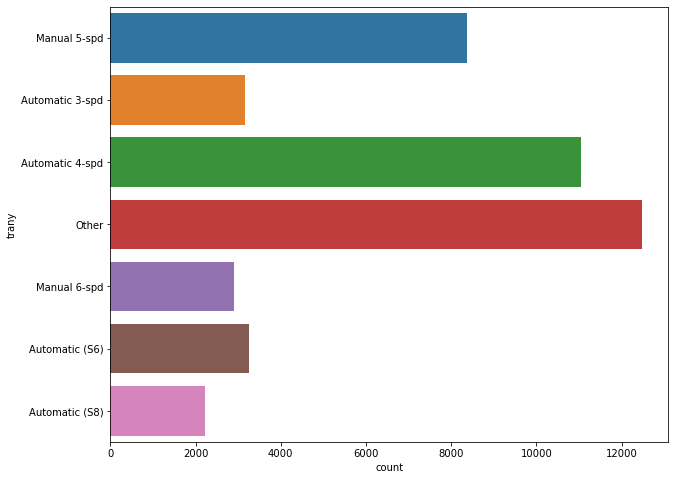

In [46]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8))
top = fueleco.trany.value_counts().index[:6]
sns.countplot(y='trany',     # doctest: +SKIP
  data= (fueleco
   .assign(trany=fueleco.trany.where(
              fueleco.trany.isin(top),
              'Other'))
  )
)

## 1-4 수치형 데이터 그래프 그리기

In [52]:
 fueleco.select_dtypes('number').columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'engId', 'feScore', 'fuelCost08', 'fuelCostA08', 'ghgScore',
       'ghgScoreA', 'highway08', 'highway08U', 'highwayA08', 'highwayA08U',
       'highwayCD', 'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4',
       'pv2', 'pv4', 'range', 'rangeCity', 'rangeCityA', 'rangeHwy',
       'rangeHwyA', 'UCity', 'UCityA', 'UHighway', 'UHighwayA', 'year',
       'youSaveSpend', 'charge240b', 'phevCity', 'phevHwy', 'phevComb'],
      dtype='object')

In [55]:
fueleco.cylinders.describe()

count    43139.000000
mean         5.710865
std          1.764527
min          2.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: cylinders, dtype: float64

<AxesSubplot:>

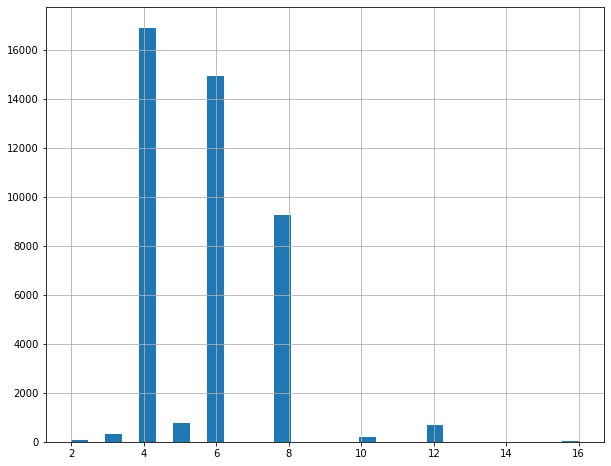

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
fueleco.cylinders.hist(ax=ax, bins=30) #bins를 조절해줬어

# 2. 상관계수 보기

In [59]:
 fueleco.select_dtypes('number')

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,23.3333,0.0,35.0000,0.0,1985,-2250,0.0,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,11.0000,0.0,19.0000,0.0,1985,-11500,0.0,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,29.0000,0.0,47.0000,0.0,1985,0,0.0,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,12.2222,0.0,16.6667,0.0,1985,-11500,0.0,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,21.0000,0.0,32.0000,0.0,1993,-6000,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43413,14.982273,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,24.0000,0.0,37.0000,0.0,1993,-1750,0.0,0,0,0
43414,14.330870,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,25.0000,0.0,39.0000,0.0,1993,-1250,0.0,0,0,0
43415,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,23.0000,0.0,34.0000,0.0,1993,-2250,0.0,0,0,0
43416,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,23.0000,0.0,34.0000,0.0,1993,-2250,0.0,0,0,0


In [61]:
fueleco.barrels08.corr(fueleco.charge240)

-0.297841986478923

In [64]:
fueleco.barrelsA08.corr(fueleco.charge240)

0.045672217959101626

<AxesSubplot:>

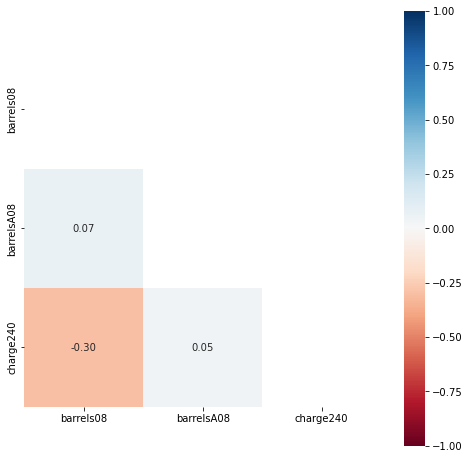

In [65]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))
corr = fueleco[['barrels08', 'barrelsA08', 'charge240']].corr()
mask = np.zeros_like(corr, dtype=bool) #array를 만드는데 0을 채워서 넣겠다. bool타입으로 넣겠다
mask[np.triu_indices_from(mask)] = True #triangle upper 위쪽 칸을 True로 하여 보여주겠다
sns.heatmap(corr, mask=mask, # mask를 넘겨줬어
    fmt='.2f', annot=True, ax=ax, cmap='RdBu', vmin=-1, vmax=1,
    square=True)